# Nordstrom-Ford Regression (in Python)

Daily price regression of closing prices for JWN and F

In [5]:
%matplotlib inline

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import quandl
import functools
import seaborn as sns
import statsmodels.formula.api as sm
quandl.ApiConfig.api_key = 'i4S54y_7sYro1ygHmH44'

In [10]:
#memoized function for querying Quandl data
@functools.lru_cache(maxsize=16)
def fetch_quandl(my_securities):
    print("Fetching from Quandl")
    qdata = quandl.get(list(my_securities), returns="pandas")
    return qdata

In [11]:
# Data Fetching
raw_data = fetch_quandl(('WIKI/F', "WIKI/JWN"))

Fetching from Quandl


In [14]:
#function for data cleaning
def clean_quandl_columns(dataframe):
    replacement_columns = {}
    for c in dataframe.columns:
        series_name, variable = c.split(' - ')
        source_name, asset = series_name.split('/')
        replacement_columns[c] = asset+":"+variable
    renamed_data = dataframe.rename(columns=replacement_columns)
    return renamed_data
renamed_data = clean_quandl_columns(raw_data)
final_data = renamed_data['20170619':'20170714']

In [16]:
# Model Implementation
f = final_data["F:Adj. Close"]
jwn = final_data["JWN:Adj. Close"]
mod1 = sm.ols('jwn~f',data=final_data).fit()
mod1.summary()

/usr/local/lib/python3.4/dist-packages/scipy-1.0.1-py3.4-linux-x86_64.egg/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    jwn   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.055
Method:                 Least Squares   F-statistic:                   0.06352
Date:                Tue, 08 May 2018   Prob (F-statistic):              0.804
Time:                        20:07:00   Log-Likelihood:                -19.967
No. Observations:                  19   AIC:                             43.93
Df Residuals:                      17   BIC:                             45.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.4723     10.082      4.907      0.000      28.202      70.743
f             -0.2312      0.917     -0.252      0.804      -2.167       1.704
==============================================================================
Omnibus:                        1.644   Durbin-Watson:                   1.067
Prob(Omnibus):                  0.439   Jarque-Bera (JB):                1.351
Skew:                          -0.506   Prob(JB):                        0.509
Kurtosis:                       2.173   Cond. No.                         665.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

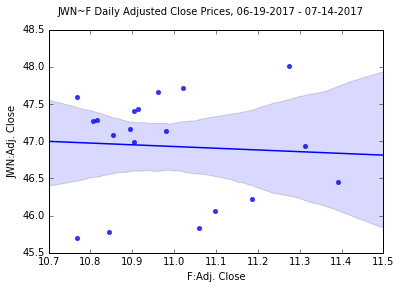

In [17]:
# Model Plot
fig, ax = plt.subplots()
splot = sns.regplot("F:Adj. Close","JWN:Adj. Close",data=final_data, ax=ax)
fig.suptitle('JWN~F Daily Adjusted Close Prices, 06-19-2017 - 07-14-2017')

In [18]:
# Calculate the daily return for the two stocks during birthday month
final_data['F:Ret']=final_data['F:Adj. Close'].pct_change(1)
final_data['JWN:Ret']=final_data['JWN:Adj. Close'].pct_change(1)

/usr/local/lib/python3.4/dist-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/usr/local/lib/python3.4/dist-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [20]:
# Model Implementation
JWN_ret = final_data["JWN:Ret"]
F_ret = final_data["F:Ret"]
mod2 = sm.ols('JWN_ret~F_ret', data=final_data).fit()
mod2.summary()

/usr/local/lib/python3.4/dist-packages/scipy-1.0.1-py3.4-linux-x86_64.egg/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                JWN_ret   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     2.869
Date:                Tue, 08 May 2018   Prob (F-statistic):              0.110
Time:                        20:12:27   Log-Likelihood:                 51.164
No. Observations:                  18   AIC:                            -98.33
Df Residuals:                      16   BIC:                            -96.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0024      0.004     -0.669      0.513      -0.010       0.005
F_ret          0.4996      0.295      1.694      0.110      -0.126       1.125
==============================================================================
Omnibus:                        2.746   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.253   Jarque-Bera (JB):                1.099
Skew:                          -0.532   Prob(JB):                        0.577
Kurtosis:                       3.576   Cond. No.                         83.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

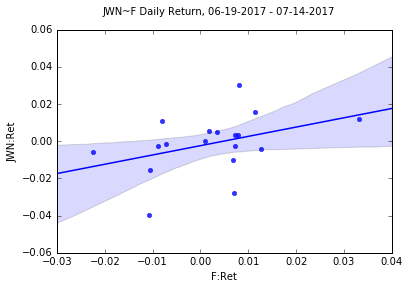

In [21]:
fig, ax = plt.subplots()
splot = sns.regplot("F:Ret","JWN:Ret",data=final_data, ax=ax)
fig.suptitle('JWN~F Daily Return, 06-19-2017 - 07-14-2017')